In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error,mean_absolute_error, mean_absolute_percentage_error
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings('ignore')
import itertools

In [2]:
df=pd.read_csv('product d.csv', parse_dates=['Month-Year'], index_col='Month-Year')

In [3]:
df.head(15)

,Product Name,Product Category,Month,Year,Sales,Market Size,Marketing Expense,Month No.
Month-Year,,,,,,,,
2019-01-01,Product D,Iron Preparation,January,2019,96684,371027,879515,1
2019-02-01,Product D,Iron Preparation,February,2019,99187,380632,902285,2
2019-03-01,Product D,Iron Preparation,March,2019,113711,436369,1034407,3
2019-04-01,Product D,Iron Preparation,April,2019,103982,399033,945904,4
2019-05-01,Product D,Iron Preparation,May,2019,101826,390760,926291,5
2019-06-01,Product D,Iron Preparation,June,2019,106736,409602,970956,6
2019-07-01,Product D,Iron Preparation,July,2019,91567,351390,832967,7
2019-08-01,Product D,Iron Preparation,August,2019,96918,371925,881644,8
2019-09-01,Product D,Iron Preparation,September,2019,89551,343654,814628,9


In [4]:
sales_d= df.drop(['Product Name','Product Category','Month','Year','Month No.'],axis=1)

In [5]:
sales_d.shape

(60, 3)

In [6]:
sales_d.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2019-01-01 to 2023-12-01
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Sales              60 non-null     int64
 1   Market Size        60 non-null     int64
 2   Marketing Expense  60 non-null     int64
dtypes: int64(3)
memory usage: 1.9 KB


In [7]:
print('Total Sales:', sales_d['Sales'].sum())
print('Total Market Size:',sales_d['Market Size'].sum())
print('Total Marketing Expense:', sales_d['Marketing Expense'].sum())

Total Sales: 7173488
Total Market Size: 22698270
Total Marketing Expense: 20113818


Text(0.5, 1.0, 'Product D')

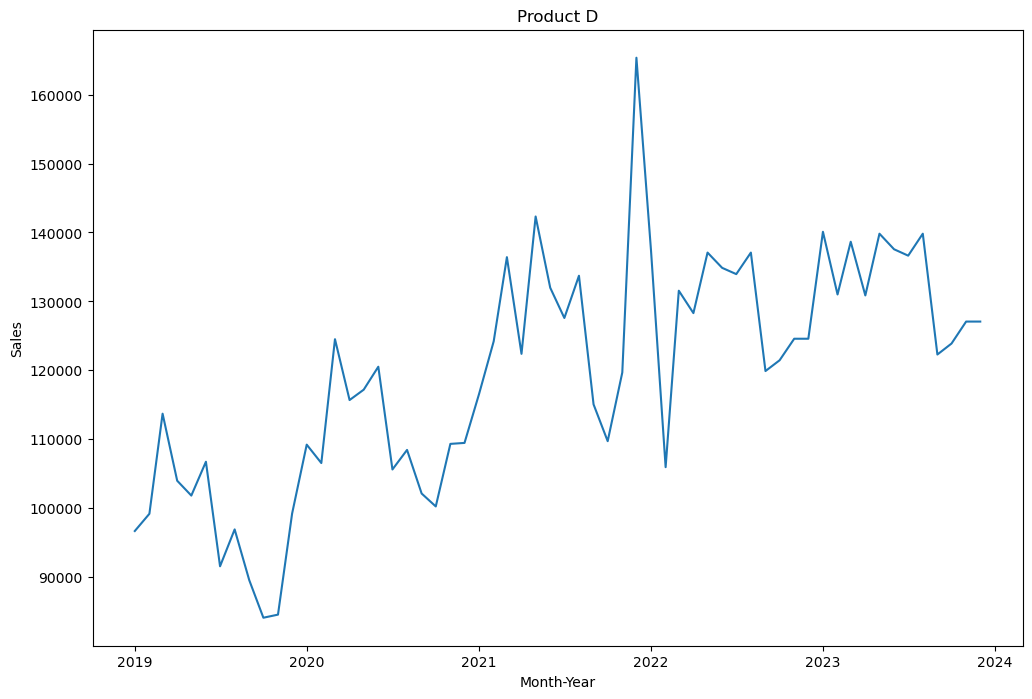

In [8]:
plt.figure(figsize=(12,8))
sns.lineplot(sales_d['Sales'])
plt.title('Product D')

In [9]:
from statsmodels.tsa.stattools import adfuller

In [10]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [11]:
adf_test(sales_d['Sales'])

ADF Statistics: -2.3249460487083105
p- value: 0.16404854202961083
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [12]:
sales_d_diff= sales_d['Sales'].diff().dropna()

Text(0.5, 1.0, 'Product D - First Difference')

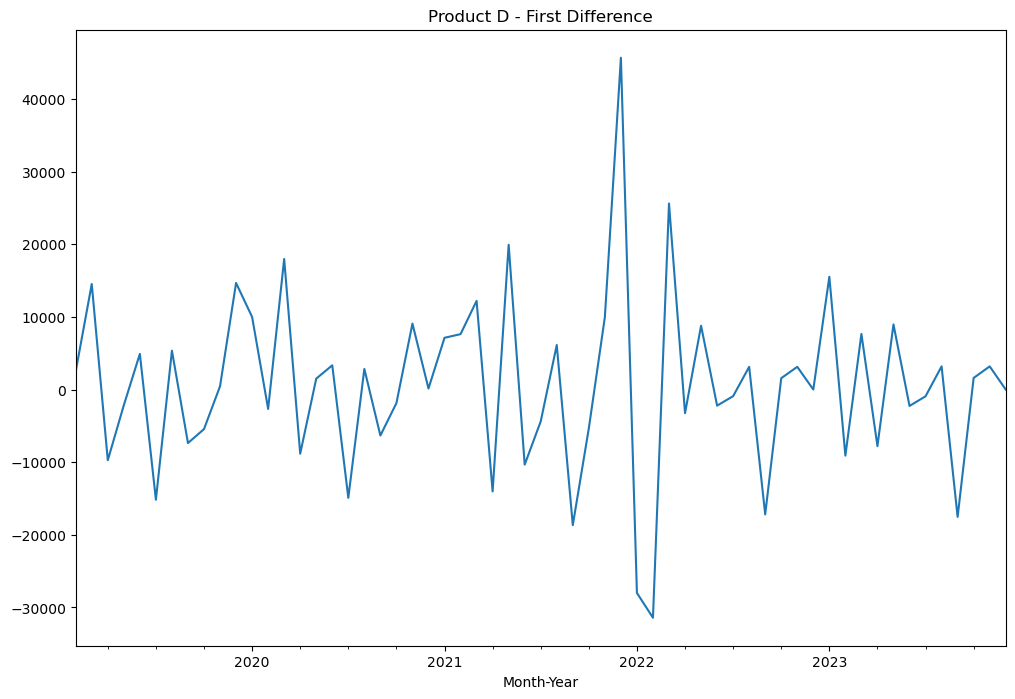

In [13]:
sales_d_diff.plot(figsize=(12,8))
plt.title('Product D - First Difference')

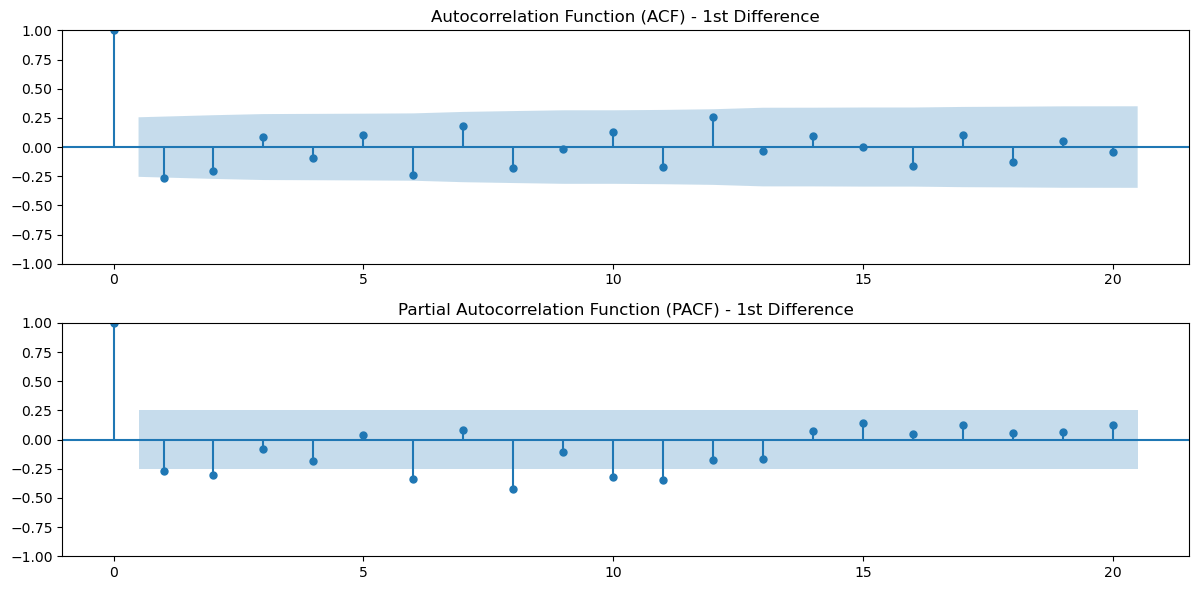

In [14]:
# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(sales_d_diff, lags=20, ax=plt.gca())
plt.title('Autocorrelation Function (ACF) - 1st Difference')

plt.subplot(212)
plot_pacf(sales_d_diff, lags=20, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) - 1st Difference')

plt.tight_layout()
plt.show()

In [15]:
adf_test(sales_d_diff)

ADF Statistics: -4.6011480666771325
p- value: 0.00012854172822943823
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [16]:
train= sales_d[:57]
test=sales_d[57:]

In [17]:
print(len(train), len(test))

57 3


In [18]:
#Finding the best value for ARIMA

#import itertools
#p=d=q=range(0,5)
#pdq = list(itertools.product(p,d,q))

#for param in pdq:
#    try:
#        model_arima = ARIMA(train,order=param)
#        model_arima_fit = model_arima.fit()
#       print(param,model_arima_fit.aic)
#    except:
#        continue
    
# The Akaike information criterion (AIC) is an estimator of in-sample prediction error and thereby relative quality of
# statistical models for a given set of data

# It's like the mean squared error in Regression - The smaller the number, the better

In [19]:
#therefore, the combination p=(0,1,2,3,4,5) d=1 q=(0,1,2,3) must be tested with accuracy metrics and aic

In [20]:
#param = [(0,1,0),(0,1,1),(0,1,2),(0,1,3),(1,1,0),(1,1,1),(1,1,2),(1,1,3),(2,1,0), (2,1,1), (2,1,2),(2,1,3),(3,1,0),(3,1,1),(3,1,2),(3,1,3),(4,1,0),(4,1,1),(4,1,2),(4,1,3),(5,1,0),(5,1,1),(5,1,2),(5,1,3)]

#for p in param:  # Changed 'x' to 'p'
#    model = ARIMA(train, order=p).fit()
#    pred = model.forecast(steps=len(test))
#    mae = mean_absolute_error(test, pred)
#    mape = np.mean(np.abs((test - pred) / test)) * 100
#    mse=mean_squared_error(test, pred)
#    rmse = np.sqrt(mean_squared_error(test, pred))
#    print(p)
#    print(f'MAE: {mae}')
#    print(f'MSE: {mse}')
#    print(f'RMSE: {rmse}')
#    print('A.I.C:', model.aic)

In [21]:
order=[]
for p in range(6):
    # Loop over MA order
    for q in range(2):
        # Fit model        
#       model= ARIMA(sales_b, order=(p,1,q))
        model_t = ARIMA(train['Sales'], order=(p,1,q), exog=train[['Market Size','Marketing Expense']])
        model_test=model_t.fit() 
        pred=model_test.predict(start=len(train), end=(len(sales_d)-1), exog=test[['Market Size','Marketing Expense']])
        mae = mean_absolute_error(test['Sales'], pred)
        mape = np.mean(np.abs((test['Sales'] - pred) / test)) * 100
        mse=mean_squared_error(test['Sales'], pred)
        rmse = np.sqrt(mean_squared_error(test['Sales'], pred))
        # Add order and scores to list        
        order.append((p, q, model_test.aic, model_test.bic,mae, mse, rmse))
#Make DataFrame of model order and AIC/BIC scores
order_df = pd.DataFrame(order, columns=['p','q', 'aic', 'bic', 'mae','mse', 'rmse'])

In [22]:
# Sort by AIC
print(order_df.sort_values('aic'))

    p  q          aic          bic          mae           mse         rmse
1   0  1  1210.316790  1218.418197  3231.467233  1.436528e+07  3790.156086
3   1  1  1211.377467  1221.504225  3129.252467  1.182772e+07  3439.145215
5   2  1  1213.015760  1225.167871  3278.837393  1.262193e+07  3552.735666
4   2  0  1213.184905  1223.311663  2327.426231  7.248335e+06  2692.273171
6   3  0  1214.252466  1226.404576  2568.932851  9.710012e+06  3116.089151
7   3  1  1214.838511  1229.015973  3162.462005  1.217442e+07  3489.186094
2   1  0  1215.384123  1223.485529  1949.793090  4.141197e+06  2034.993092
8   4  0  1215.537350  1229.714812  2973.971878  1.176291e+07  3429.710087
9   4  1  1216.825516  1233.028329  3142.382688  1.201612e+07  3466.428190
10  5  0  1217.482047  1233.684861  2972.191483  1.175815e+07  3429.015553
11  5  1  1218.818870  1237.047035  3146.621226  1.204866e+07  3471.118182
0   0  0  1387.344993  1393.421048  2788.443831  1.073841e+07  3276.951328


In [23]:
m_arima= ARIMA(train['Sales'], order=(0,1,1), exog=train[['Market Size','Marketing Expense']])
model_arima=m_arima.fit()
print(model_arima.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   57
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -601.158
Date:                Thu, 09 May 2024   AIC                           1210.317
Time:                        16:52:16   BIC                           1218.418
Sample:                    01-01-2019   HQIC                          1213.458
                         - 09-01-2023                                         
Covariance Type:                  opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Market Size           0.1743      0.029      5.961      0.000       0.117       0.232
Marketing Expense    -0.0044      0.018     -0.243      0.808      -0.040       0.031
ma.L1                -0.

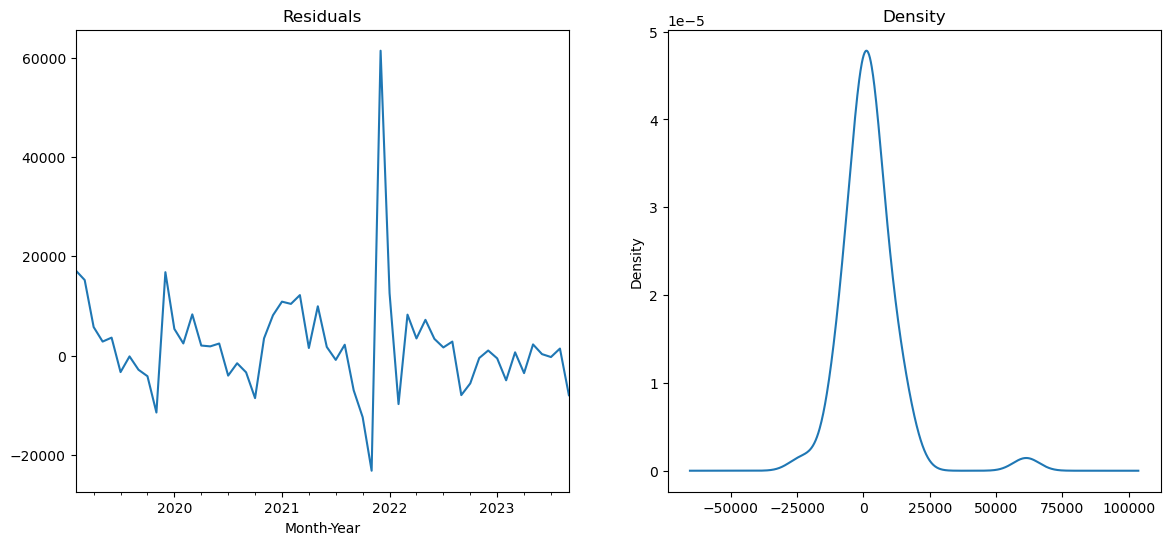

In [24]:
residuals= model_arima.resid[1:]
fig,ax=plt.subplots(1,2, figsize=(14, 6))
residuals.plot(title='Residuals',ax=ax[0])
residuals.plot(title='Density',kind='kde',ax=ax[1])
plt.show()

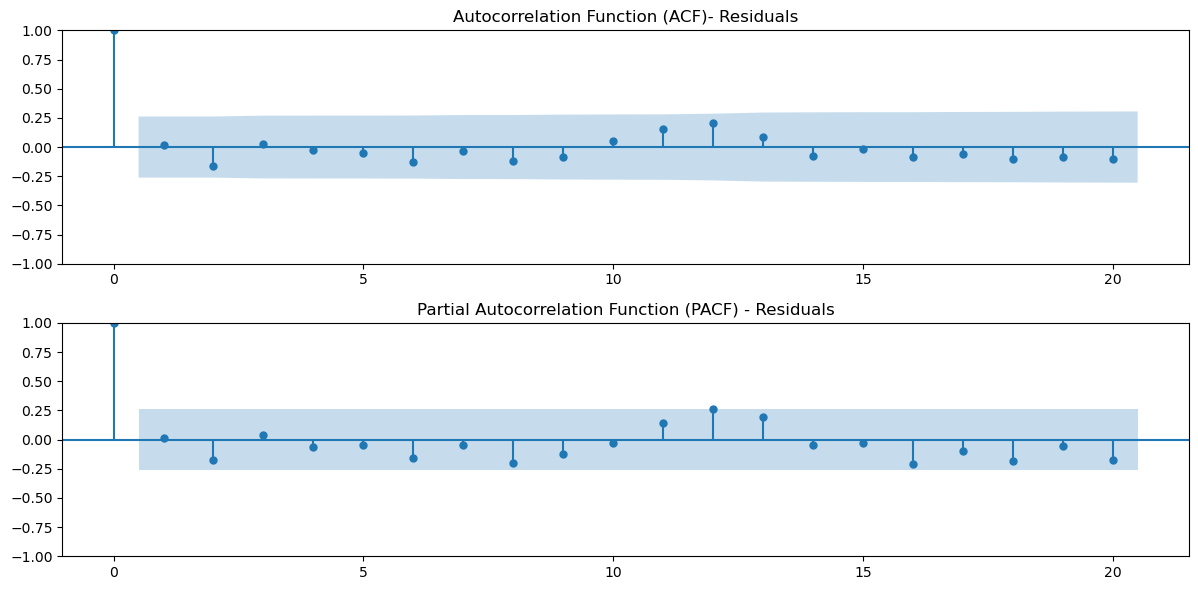

In [25]:
# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(residuals, lags=20, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)- Residuals')

plt.subplot(212)
plot_pacf(residuals, lags=20, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) - Residuals')

plt.tight_layout()
plt.show()

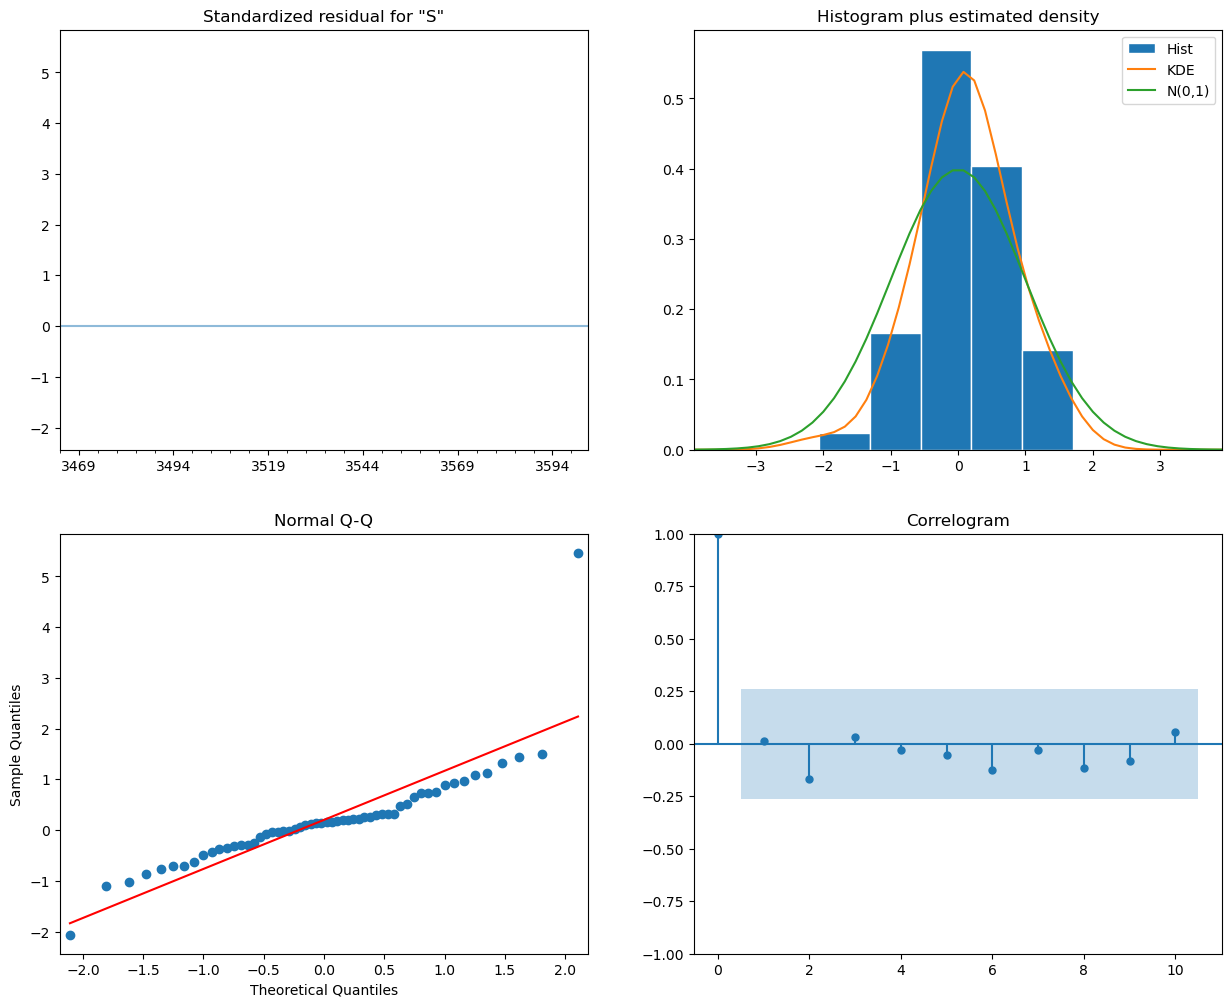

In [26]:
# Create the 4 diagostics plots
model_arima.plot_diagnostics(figsize=(15, 12))
plt.show()

In [27]:
#pred_in_sample = model_arima.get_prediction(start=len(train), end=(len(sales_b)-1))
#sales_b['Forecast_ARIMA_p']=[None]*len(train) + list(pred)

In [28]:
#plt.figure(figsize=(12, 8))
#sns.lineplot(sales_b[['Sales','Forecast_ARIMA_p']])
#plt.title('Product B')
#plt.show()

In [29]:
pred=model_arima.predict(start=len(train), end=(len(sales_d)-1), exog=test[['Market Size','Marketing Expense']], dynamic = True)
sales_d['Forecast_ARIMAX']=[None]*len(train) + list(pred)
#sales_b.plot()

In [30]:
#pred=model_arima.forecast(steps= len(test))
#sales_b['Forecast_ARIMA']=[None]*len(train) + list(pred)
#sales_b.plot()

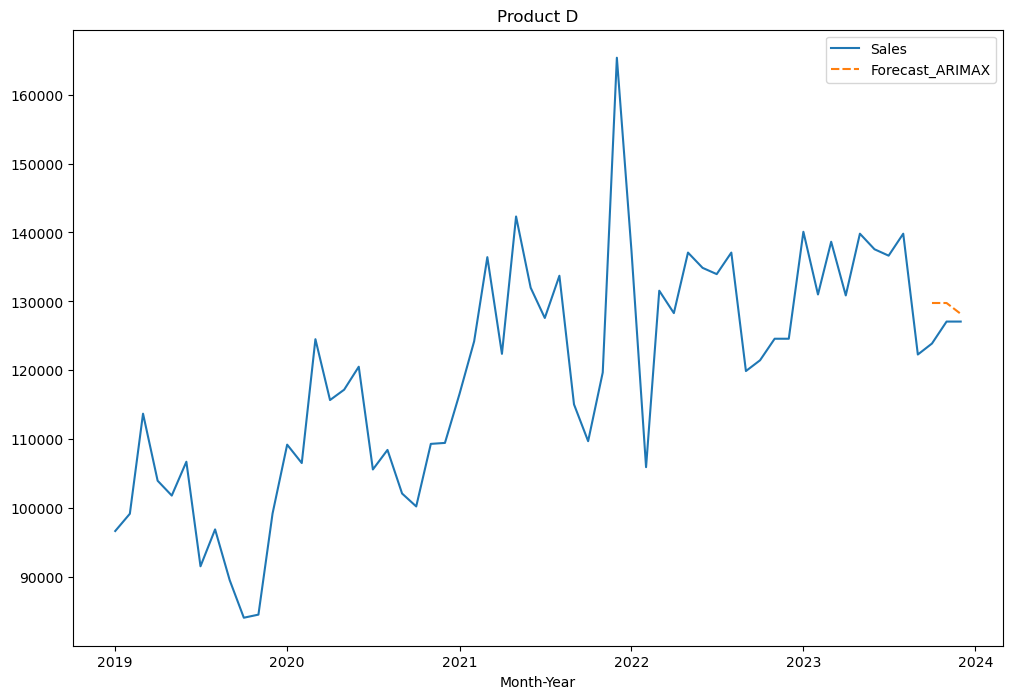

In [31]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_d[['Sales','Forecast_ARIMAX']])
plt.title('Product D')
plt.show()

In [32]:
mae_arimax= mean_absolute_error(test['Sales'],pred)
mse_arimax=mean_squared_error(test['Sales'], pred)
mape_arimax= mean_absolute_percentage_error(test['Sales'],pred)
rmse_arimax= np.sqrt(mean_squared_error(test['Sales'],pred))

print(f'MAE - ARIMAX: {mae_arimax}')
print(f'MAPE - ARIMAX: {mape_arimax}')
print(f'MSE - ARIMAX: {mse_arimax}')
print(f'RMSE - ARIMAX: {rmse_arimax}')

MAE - ARIMAX: 3231.467232926778
MAPE - ARIMAX: 0.02582665404100926
MSE - ARIMAX: 14365283.158127986
RMSE - ARIMAX: 3790.15608624869


# SARIMA

In [33]:
import statsmodels.api as sm

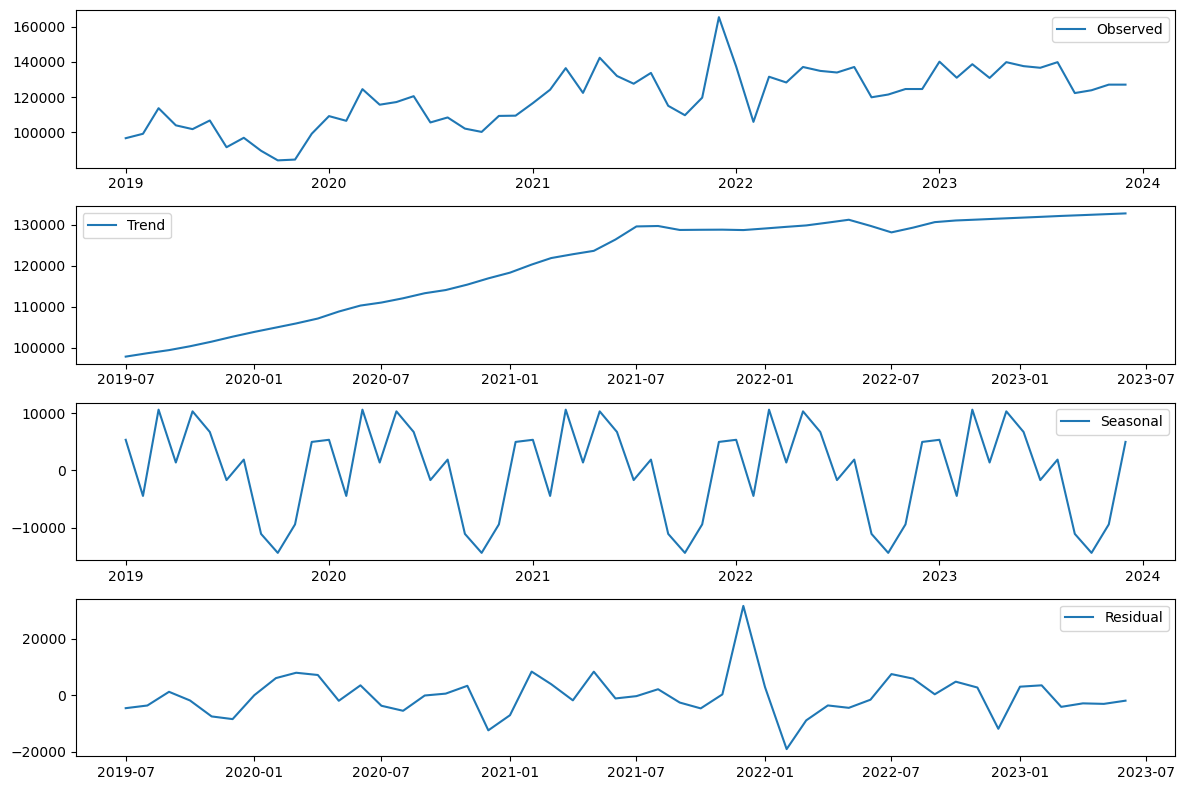

In [34]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
decomposition = seasonal_decompose(sales_d['Sales'], model='additive', period=12)

# Plot the decomposition
#fig = decomposition.plot(figsize=(12,8))
#plt.show()
# Create a new figure with the specified size
plt.figure(figsize=(12, 8))

# Plot each component separately
plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend()

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend()

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

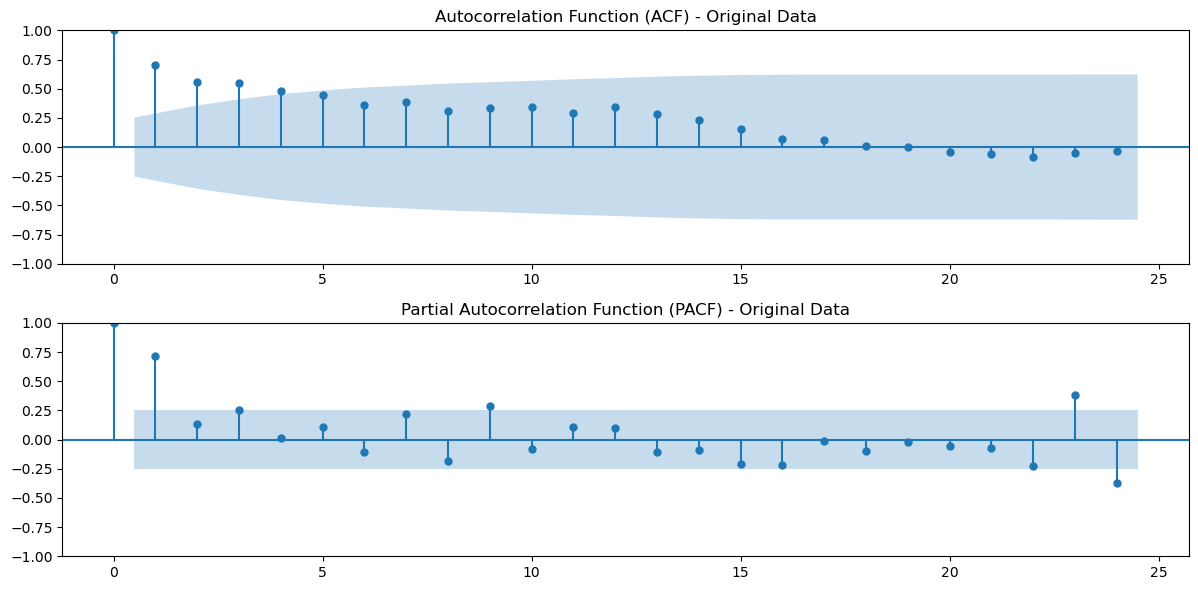

In [35]:
# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(sales_d['Sales'], lags=24, ax=plt.gca())
plt.title('Autocorrelation Function (ACF) - Original Data')

plt.subplot(212)
plot_pacf(sales_d['Sales'], lags=24, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) - Original Data')

plt.tight_layout()
plt.show()

In [36]:
order_SARIMAX=[]
# Loop over P order
for P in range(5):
    # Loop over Q order
    for Q in range(4):
        # Fit model
        model_s = sm.tsa.statespace.SARIMAX(train['Sales'], order=(0, 1, 1), seasonal_order=(P, 0, Q, 12),exog=train[['Market Size','Marketing Expense']])
        model_test_s = model_s.fit() 
        pred = model_test_s.predict(start=57, end=59, dynamic=True, exog=test[['Market Size','Marketing Expense']])
        mae = mean_absolute_error(test['Sales'], pred)
        mse = mean_squared_error(test['Sales'], pred)
        # Add order and scores to list        
        order_SARIMAX.append((P, Q, model_test_s.aic, model_test_s.bic, mae, mse))

# Make DataFrame of model order and scores
order_SARIMAX_df = pd.DataFrame(order_SARIMAX, columns=['P', 'Q', 'aic', 'bic', 'mae', 'mse'])


In [37]:
# Sort by AIC
print(order_SARIMAX_df.sort_values('aic'))

    P  Q          aic          bic           mae           mse
12  3  0  1202.763773  1216.941235   8853.289182  1.104483e+08
2   0  2  1203.361283  1215.513393   7671.208955  9.134292e+07
6   1  2  1203.852177  1218.029638   7465.012379  7.360795e+07
9   2  1  1204.406153  1218.583615   9910.078271  1.574568e+08
3   0  3  1204.611217  1218.788678   6508.855437  5.486820e+07
16  4  0  1204.640597  1220.843410   8621.488466  1.020650e+08
13  3  1  1204.645203  1220.848016   8704.114726  1.047486e+08
7   1  3  1205.025675  1221.228488   8862.138827  1.130192e+08
10  2  2  1205.243662  1221.446476   8954.335864  1.170702e+08
8   2  0  1205.301353  1217.453464  10032.745571  1.788607e+08
14  3  2  1206.642605  1224.870770   8665.358859  1.035145e+08
17  4  1  1206.644292  1224.872458   8694.140909  1.044104e+08
11  2  3  1207.222480  1225.450646   9139.333297  1.241566e+08
18  4  2  1208.640643  1228.894160   8623.649660  1.021471e+08
15  3  3  1208.642321  1228.895838   8648.583254  1.033

In [38]:
sarima=sm.tsa.statespace.SARIMAX(train['Sales'],order=(0, 1, 1),seasonal_order=(3,0,0,12),exog=train[['Market Size','Marketing Expense']])
sarima_model=sarima.fit()
print(sarima_model.summary())

                                      SARIMAX Results                                      
Dep. Variable:                               Sales   No. Observations:                   57
Model:             SARIMAX(0, 1, 1)x(3, 0, [], 12)   Log Likelihood                -594.382
Date:                             Thu, 09 May 2024   AIC                           1202.764
Time:                                     16:54:13   BIC                           1216.941
Sample:                                 01-01-2019   HQIC                          1208.260
                                      - 09-01-2023                                         
Covariance Type:                               opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Market Size           0.1359      0.044      3.104      0.002       0.050       0.222
Market

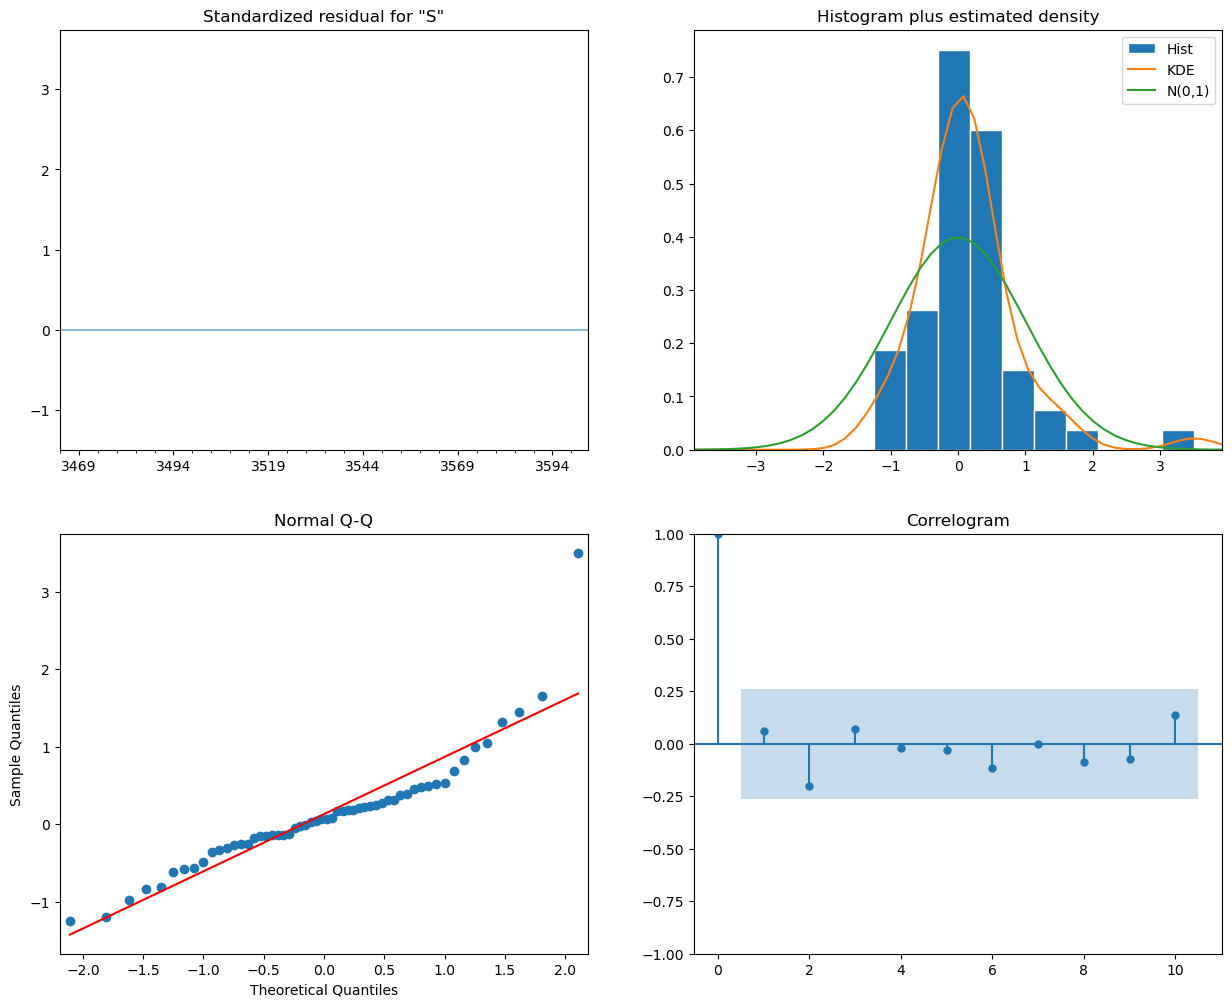

In [39]:
sarima_model.plot_diagnostics(figsize=(15, 12))
plt.show()

In [40]:
forecast_test_sarima=sarima_model.predict(start=57, end=59, dynamic=True, exog=test[['Market Size','Marketing Expense']])

In [41]:
sales_d['Forecast_SARIMAX']=[None]*len(train)+ list(forecast_test_sarima)
#sales_b[['Sales','Forecast_SARIMA']].plot(figsize=(12,8))

Text(0.5, 1.0, 'Product D')

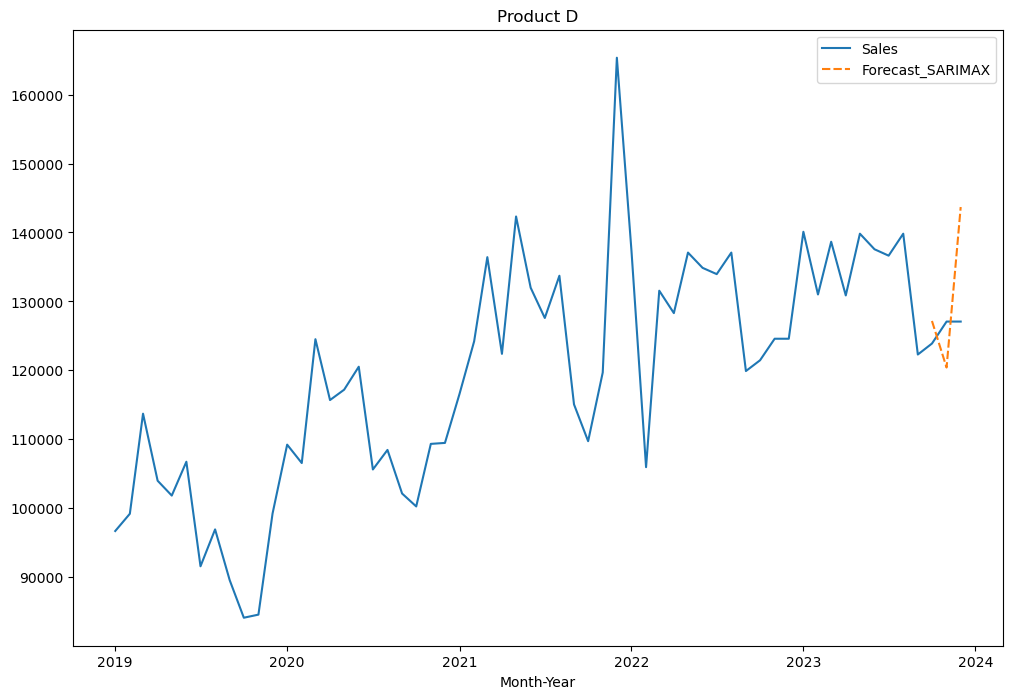

In [42]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_d[['Sales','Forecast_SARIMAX']])
plt.title('Product D')

In [43]:
mae_sarimax= mean_absolute_error(test['Sales'],forecast_test_sarima)
mape_sarimax= mean_absolute_percentage_error(test['Sales'],forecast_test_sarima)
mse_sarimax=mean_squared_error(test['Sales'], forecast_test_sarima)
rmse_sarimax= np.sqrt(mean_squared_error(test['Sales'],forecast_test_sarima))

print(f'MAE - SARIMAX: {round(mae_sarimax,3)}')
print(f'MAPE - SARIMAX: {round(mape_sarimax,3)}')
print(f'MSE - SARIMAX: {round(mse_sarimax,3)}')
print(f'RMSE - SARIMAX: {round(rmse_sarimax,3)}')

MAE - SARIMAX: 8853.289
MAPE - SARIMAX: 0.07
MSE - SARIMAX: 110448334.035
RMSE - SARIMAX: 10509.44


# AUTO-ARIMA

In [44]:
import pmdarima as pm

In [45]:
auto_arima= pm.auto_arima(train['Sales'], start_p=0, d=1, start_q=0, max_p=5,max_q=2,
                          start_P=0, D=0, start_Q=0, max_P=5 ,max_Q=4 ,  
                          stepwise=False, trace=True,
                          seasonal=True,m=12, exogenous=train[['Market Size','Marketing Expense']])
auto_arima

 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1221.208, Time=0.02 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=1220.588, Time=0.05 sec
 ARIMA(0,1,0)(0,0,2)[12] intercept   : AIC=1217.577, Time=0.22 sec
 ARIMA(0,1,0)(0,0,3)[12] intercept   : AIC=1216.225, Time=0.44 sec
 ARIMA(0,1,0)(0,0,4)[12] intercept   : AIC=1216.996, Time=2.28 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=1219.715, Time=0.08 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1220.763, Time=0.12 sec
 ARIMA(0,1,0)(1,0,2)[12] intercept   : AIC=1214.519, Time=0.53 sec
 ARIMA(0,1,0)(1,0,3)[12] intercept   : AIC=1216.518, Time=1.14 sec
 ARIMA(0,1,0)(1,0,4)[12] intercept   : AIC=1218.484, Time=5.82 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=1218.880, Time=0.15 sec
 ARIMA(0,1,0)(2,0,1)[12] intercept   : AIC=1215.795, Time=0.29 sec
 ARIMA(0,1,0)(2,0,2)[12] intercept   : AIC=1216.519, Time=0.54 sec
 ARIMA(0,1,0)(2,0,3)[12] intercept   : AIC=1218.471, Time=3.15 sec
 ARIMA(0,1,0)(3,0,0)[12] intercept   : AIC=1217.196, Time=0.57

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(1, 0, 2, 12),
      suppress_warnings=True)

In [46]:
auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                   57
Model:             SARIMAX(0, 1, 1)x(1, 0, [1, 2], 12)   Log Likelihood                -600.082
Date:                                 Thu, 09 May 2024   AIC                           1212.165
Time:                                         16:55:45   BIC                           1224.317
Sample:                                     01-01-2019   HQIC                          1216.876
                                          - 09-01-2023                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    716.3197   4286.109      0.167      0.867   -7684.300    9116.939
ma.L1         -0.1981      0.091     -2.172      0.030      -0.377      -0.019
ar.S.L12      -0.7464      0.559     -1.336      0.182      -1.842       0.349
ma.S.L12       1.0432      0.619      1.684      0.092      -0.171       2.257
ma.S.L24       0.4889      0.225      2.170      0.030       0.047       0.931
sigma2      1.476e+08      0.010   1.51e+10      0.000    1.48e+08    1.48e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.87   Jarque-Bera (JB):                24.25
Prob(Q):                              0.35   Prob(JB):                         0.00
Heteroskedasticity (H):               0.40   Skew:                             0.55
Prob(H) (two-sided):                  0.05   Kurtosis:                         6.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.41e+26. Standard errors may be unstable.
"""

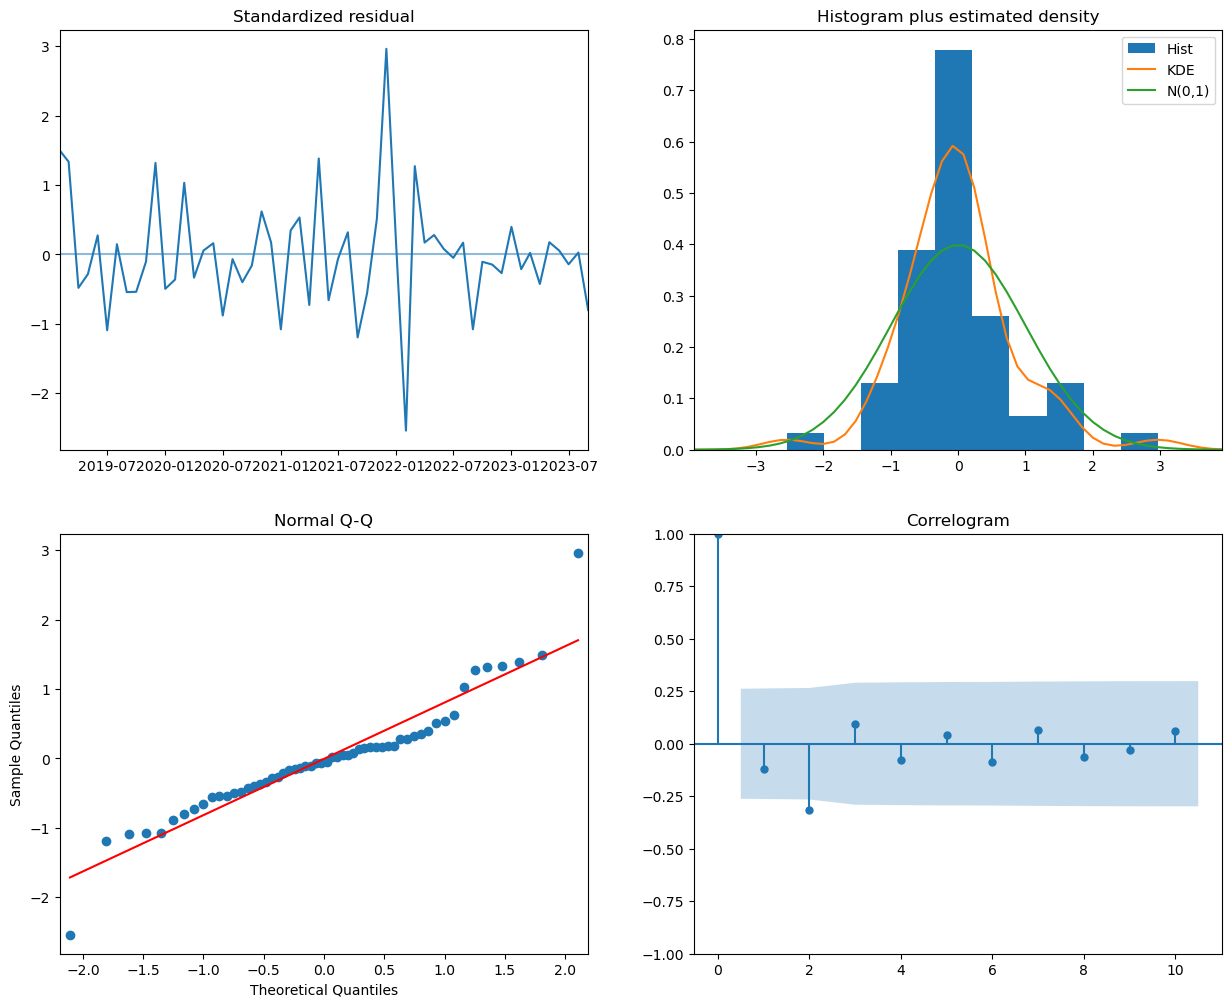

In [47]:
auto_arima.plot_diagnostics(figsize=(15, 12))
plt.show()

In [48]:
forecast_test_auto= auto_arima.predict(n_periods=len(test), exogenous=test[['Market Size','Marketing Expense']])
sales_d['Forecast_AUTO ARIMAX']=[None]*len(train)+ list(forecast_test_auto)
#sales_b[['Sales','Forecast_AUTO ARIMA']].plot()

Text(0.5, 1.0, 'Product D')

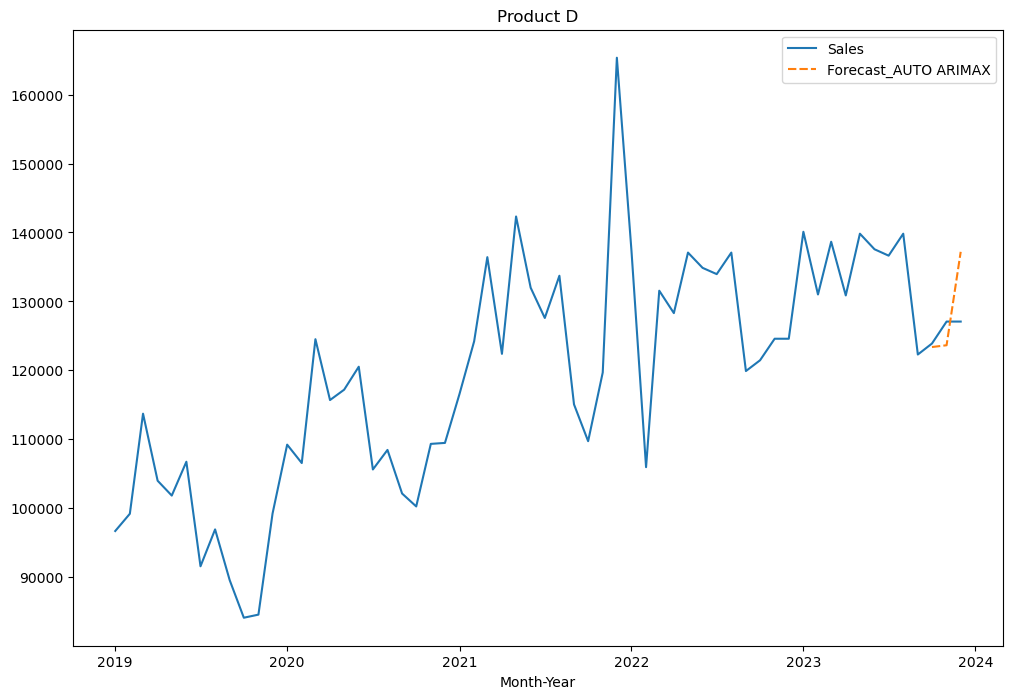

In [49]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_d[['Sales','Forecast_AUTO ARIMAX']])
plt.title('Product D')

In [50]:
mae_auto_arimax= mean_absolute_error(test['Sales'],forecast_test_auto)
mape_auto_arimax= mean_absolute_percentage_error(test['Sales'],forecast_test_auto)
mse_auto_arimax=mean_squared_error(test['Sales'],forecast_test_auto)
rmse_auto_arimax= np.sqrt(mean_squared_error(test['Sales'],forecast_test_auto))

print(f'MAE - AUTO ARIMAX: {mae_auto_arimax}')
print(f'MAPE - AUTO ARIMAX: {mape_auto_arimax}')
print(f'MSE - AUTO ARIMAX: {mse_auto_arimax}')
print(f'RMSE - AUTO ARIMAX: {rmse_auto_arimax}')

MAE - AUTO ARIMAX: 4687.680335639496
MAPE - AUTO ARIMAX: 0.03692365892824743
MSE - AUTO ARIMAX: 38149631.24271319
RMSE - AUTO ARIMAX: 6176.538775294233


In [51]:
sales_d.tail(12)

,Sales,Market Size,Marketing Expense,Forecast_ARIMAX,Forecast_SARIMAX,Forecast_AUTO ARIMAX
Month-Year,,,,,,
2023-01-01,140104,399507,98343,NaN,NaN,NaN
2023-02-01,131006,373564,91957,NaN,NaN,NaN
2023-03-01,138656,395378,97326,NaN,NaN,NaN
2023-04-01,130866,373165,91858,NaN,NaN,NaN
2023-05-01,139824,398708,98146,NaN,NaN,NaN
2023-06-01,137565,392267,96561,NaN,NaN,NaN
2023-07-01,136637,389621,95909,NaN,NaN,NaN
2023-08-01,139824,398708,98146,NaN,NaN,NaN
2023-09-01,122293,348719,85841,NaN,NaN,NaN


In [52]:
sales_d.mean()

Sales                   119558.133333
Market Size             378304.500000
Marketing Expense       335230.300000
Forecast_ARIMAX         129243.133900
Forecast_SARIMAX        130419.486784
Forecast_AUTO ARIMAX    128069.522098
dtype: float64

In [53]:
data = {
    'model': ['ARIMAX', 'AUTO ARIMAX', 'SEASONAL ARIMAX'],
    'MAE': [mae_arimax, mae_auto_arimax, mae_sarimax],  
    'MAPE': [mape_arimax, mape_auto_arimax, mape_sarimax],  
    'MSE': [mse_arimax, mse_auto_arimax, mse_sarimax],  
    'RMSE': [rmse_arimax, rmse_auto_arimax, rmse_sarimax]  
}

model_results = pd.DataFrame(data)
model_results.set_index('model', inplace=True)
model_results

,MAE,MAPE,MSE,RMSE
model,,,,
ARIMAX,3231.467233,0.025827,1.436528e+07,3790.156086
AUTO ARIMAX,4687.680336,0.036924,3.814963e+07,6176.538775
SEASONAL ARIMAX,8853.289182,0.069891,1.104483e+08,10509.440234


# TESTING

In [19]:
auto_arima_1= pm.auto_arima(train['Sales'], start_p=0, start_q=0, max_p=5,max_q=2,
                          start_P=0, start_Q=0, max_P=2 ,max_Q=2 ,  
                          stepwise=False, trace=True,
                          seasonal=True,m=12, exogenous=train[['Market Size','Marketing Expense']])
auto_arima_1

 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1221.208, Time=0.03 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=1220.588, Time=0.06 sec
 ARIMA(0,1,0)(0,0,2)[12] intercept   : AIC=1217.577, Time=0.24 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=1219.715, Time=0.06 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1220.763, Time=0.11 sec
 ARIMA(0,1,0)(1,0,2)[12] intercept   : AIC=1214.519, Time=0.39 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=1218.880, Time=0.14 sec
 ARIMA(0,1,0)(2,0,1)[12] intercept   : AIC=1215.795, Time=0.32 sec
 ARIMA(0,1,0)(2,0,2)[12] intercept   : AIC=1216.519, Time=0.59 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1221.340, Time=0.05 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1220.752, Time=0.10 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=1216.791, Time=0.31 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1219.881, Time=0.12 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=1221.160, Time=0.19 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=1212.165, Time=0.54

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(1, 0, 2, 12),
      suppress_warnings=True)

In [20]:
auto_arima_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                   57
Model:             SARIMAX(0, 1, 1)x(1, 0, [1, 2], 12)   Log Likelihood                -600.082
Date:                                 Wed, 08 May 2024   AIC                           1212.165
Time:                                         19:07:20   BIC                           1224.317
Sample:                                     01-01-2019   HQIC                          1216.876
                                          - 09-01-2023                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    716.3197   4286.109      0.167      0.867   -7684.300    9116.939
ma.L1         -0.1981      0.091     -2.172      0.030      -0.377      -0.019
ar.S.L12      -0.7464      0.559     -1.336      0.182      -1.842       0.349
ma.S.L12       1.0432      0.619      1.684      0.092      -0.171       2.257
ma.S.L24       0.4889      0.225      2.170      0.030       0.047       0.931
sigma2      1.476e+08      0.010   1.51e+10      0.000    1.48e+08    1.48e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.87   Jarque-Bera (JB):                24.25
Prob(Q):                              0.35   Prob(JB):                         0.00
Heteroskedasticity (H):               0.40   Skew:                             0.55
Prob(H) (two-sided):                  0.05   Kurtosis:                         6.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.41e+26. Standard errors may be unstable.
"""

In [21]:
forecast_test_auto_1= auto_arima_1.predict(n_periods=len(test), exogenous=test[['Market Size','Marketing Expense']])
sales_d['Forecast_AUTO ARIMA_1']=[None]*len(train)+ list(forecast_test_auto_1)

Text(0.5, 1.0, 'Product D')

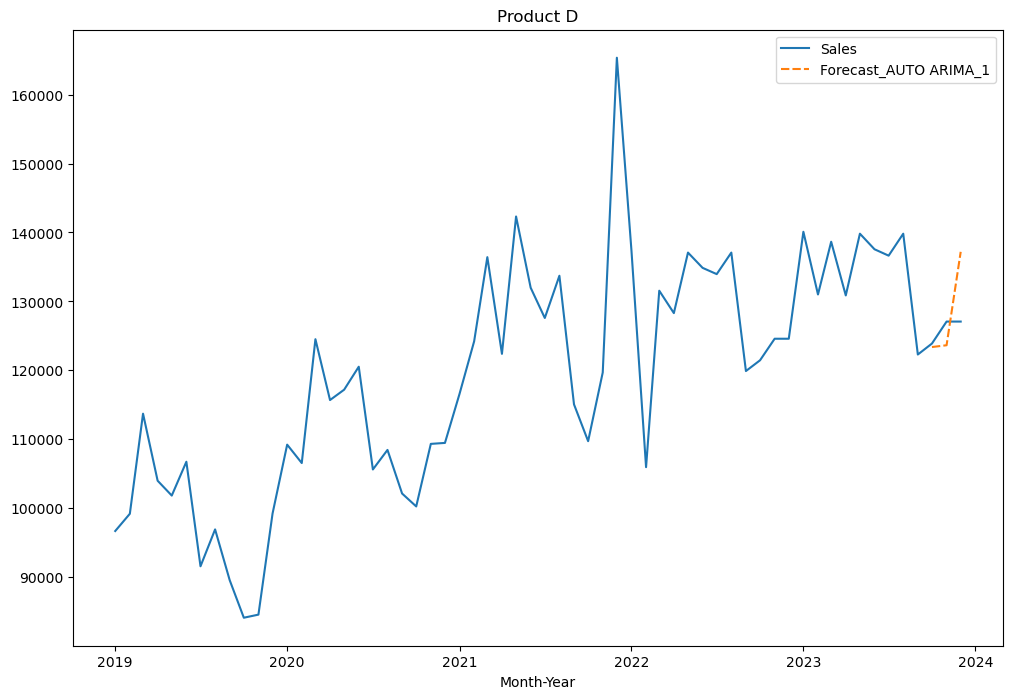

In [22]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_d[['Sales','Forecast_AUTO ARIMA_1']])
plt.title('Product D')

In [23]:
mae_auto_arima_1= mean_absolute_error(test['Sales'],forecast_test_auto_1)
mape_auto_arima_1= mean_absolute_percentage_error(test['Sales'],forecast_test_auto_1)
mse_auto_arima_1=mean_squared_error(test['Sales'],forecast_test_auto_1)
rmse_auto_arima_1= np.sqrt(mean_squared_error(test['Sales'],forecast_test_auto_1))

print(f'MAE - AUTO ARIMA: {mae_auto_arima_1}')
print(f'MAPE - AUTO ARIMA: {mape_auto_arima_1}')
print(f'MSE - AUTO ARIMA: {mse_auto_arima_1}')
print(f'RMSE - AUTO ARIMA: {rmse_auto_arima_1}')

MAE - AUTO ARIMA: 4687.680335639496
MAPE - AUTO ARIMA: 0.03692365892824743
MSE - AUTO ARIMA: 38149631.24271319
RMSE - AUTO ARIMA: 6176.538775294233
